In [2]:
import pandas as pd
import numpy as np
import copy
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from scipy.optimize import minimize
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Preprocessing

In [16]:
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stops = set(stopwords.words('english'))

In [3]:
train_df = pd.read_csv("\\Users\\dhruv\\OneDrive\\Desktop\\IITGN\\NLP\\Assignment 2\\train_dataset.csv")
test_df = pd.read_csv("\\Users\\dhruv\\OneDrive\\Desktop\\IITGN\\NLP\\Assignment 2\\test_dataset.csv")

In [4]:
train_df

,Unnamed: 0,Post_ID,Comment_ID,Comment,Majority_Sentiment
0,63830,b1ifpf,eimdlm6,How about you let people believe what they wan...,Negative
1,74546,r883cg,hn6kho0,Seems to me that you are the naive one. You h...,Negative
2,43112,zot7hf,j0ovzqb,I don't really care what fence you stand or ho...,Negative
3,156883,m7uruh,grkmbba,As if me shutting up matters. That mob gonna j...,Negative
4,25574,guknl9,fssfncv,Didn’t Sun Yat-Sen establish the nation of Chi...,Neutral
...,...,...,...,...,...
104487,75796,rszekc,hqpxj88,[Yeesh](https://i.imgur.com/MzTuPz0.gif). Aigh...,Neutral
104488,63051,b1ifpf,hrt4sj1,Don't think they have them.,Neutral
104489,129544,ow7knn,h7f8g1m,Girls made us so proud and heartiest congratul...,Positive
104490,70964,n6ct9d,gxhnitt,I wonder the same. I guess Evil_Filbert goes b...,Neutral


In [5]:
test_df

,Unnamed: 0,Post_ID,Comment_ID,Comment,Majority_Sentiment
0,4792,p5mjxp,h98tl62,why do we pretend that members of the mujahiid...,Negative
1,157273,mdrrjf,gsb4bzn,Now the russian government cannot pretend anym...,Negative
2,42030,yah7io,itf9fov,"Whether he liked it or not, he's not gonna sud...",Negative
3,23039,fywci6,fn46j5o,"lol, Chinese are the most racist. Just look at...",Negative
4,83438,6f10op,dietjm9,"They could, and are already doing it, but the ...",Negative
...,...,...,...,...,...
26119,119314,n5abcb,gx2cr2z,There are people who believe in some religion ...,Neutral
26120,148451,jjh0mv,gad16qg,Awesome!! Hat did you draw this on?,Positive
26121,81328,38heyu,crvbs4w,>The fifth in our series of articles on Global...,Negative
26122,27317,hosie8,fxxign7,Disagree. I knew Chinese who were complaining ...,Negative


In [7]:
train_sentences = []
for comment in train_df['Comment']:
    sentences = sent_tokenize(comment)
    train_sentences = sentences + train_sentences
test_sentences = []
for comment in test_df['Comment']:
    sentences = sent_tokenize(comment)
    test_sentences = sentences + train_sentences

In [ ]:
train_sentences

In [10]:
translator = str.maketrans('', '', string.punctuation)

for sent in train_sentences:
    sent = sent.lower()
    sent = sent.translate(translator)
for sent in test_sentences:
    sent = sent.lower()
    sent = sent.translate(translator)

In [20]:
train_unigram = []
for sent in train_sentences:
    words = word_tokenize(sent)
    proc_words = []
    for word in words:
        if(word not in stops): proc_words.append(word)
    train_unigram.append(proc_words)
test_unigram = []
for sent in test_sentences:
    words = word_tokenize(sent)
    proc_words = []
    for word in words:
        if(word not in stops): proc_words.append(word)
    test_unigram.append(proc_words)
    
train_bigram = copy.deepcopy(train_unigram)
test_bigram = copy.deepcopy(test_unigram)
train_trigram = copy.deepcopy(train_unigram)
test_trigram = copy.deepcopy(test_unigram)
train_quadgram = copy.deepcopy(train_unigram)
test_quadgram = copy.deepcopy(test_unigram)

In [21]:
for sent in train_bigram:
    sent.append('</s>')
    sent.insert(0, '<s>')
for sent in test_bigram:
    sent.append('</s>')
    sent.insert(0, '<s>')

In [22]:
for sent in train_trigram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
for sent in test_trigram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')

In [24]:
for sent in train_quadgram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
for sent in test_quadgram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')

In [47]:
test_unigram[11111]

['If',
 '’',
 'type',
 'gets',
 'offended',
 'enough',
 'stop',
 'watching',
 'SouthPark',
 ',',
 '’',
 'target',
 'audience',
 'first',
 'place',
 '.']

In [28]:
start_sent = '<s>'
end_sent = '</s>'

# Ngram Models

### Unigram

In [31]:
class unigram_model():
    
    def __init__(self, sentences):
        self.unigrams = dict()
        self.corpus_size = 0
        for sent in sentences:
            for word in sent:
                if word in self.unigrams:
                    self.unigrams[word]+=1
                else:
                    self.unigrams[word] = 1
                if word!=start_sent and word!=end_sent:
                    self.corpus_size+=1
        self.vocab_size = len(self.unigrams)-2
    
    def probability(self, word):
        if word not in self.unigrams:
            return 0
        else:
            return float(self.unigrams[word])/float(self.corpus_size)
        
    def perplexity(self, sent):
        sum = 0
        n = len(sent)
        for word in sent:
            if word==end_sent or word==start_sent:
                continue
            sum += np.log2(self.probability(word))
        result = 2**((-1/float(n)) * float(sum))
        return result
    
    def probability_smooth(self, word, k):
        return float(k + float(self.unigrams[word]))/(float(self.corpus_size) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = len(sent)
        for word in sent:
            if word==end_sent or word==start_sent:
                continue
            sum += np.log2(self.probability_smooth(word, k))
        result = 2**((-1/float(n)) * float(sum))
        return result

In [16]:
UNIGRAM_MODEL = unigram_model(train_unigram)

n = len(test_unigram)
sum = 0
for sent in test_unigram:
    sum+=UNIGRAM_MODEL.perplexity(sent)
avg_unigram_perplexity = sum/n
avg_unigram_perplexity

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11196\3948974202.py:28: RuntimeWarning: divide by zero encountered in log2
  sum += np.log2(self.probability(word))


inf

In [41]:
UNIGRAM_MODEL = unigram_model(train_unigram)

for sent in test_unigram:
    for word in sent:
        if word not in UNIGRAM_MODEL.unigrams:
            UNIGRAM_MODEL.unigrams[word] = 0

UNIGRAM_MODEL.vocab_size = len(UNIGRAM_MODEL.unigrams)-2

def avg_pp_unigram(k):
    n = len(test_unigram)
    sum = 0
    for sent in test_unigram:
        sum+=UNIGRAM_MODEL.perplexity_smooth(sent, k)
    avg_unigram_perplexity_smooth = sum/n
    print(k, avg_unigram_perplexity_smooth)
    return avg_unigram_perplexity_smooth 

In [42]:
x = np.linspace(5, 5.5, 10)
y = []
for i in x:
    y.append(avg_pp_unigram(i))
    
plt.plot(x, y)

ZeroDivisionError: float division by zero

In [48]:
k = x[np.argmin(y)]
print('Optimized perplixity for Unigram for k =', k,'is', avg_pp_unigram(k))

5.111111111111111 89.86832237036468
Optimized perplixity for Unigram for k = 5.111111111111111 is 89.86832237036468


### Bigram

In [32]:
class bigram_model(unigram_model):
    
    def __init__(self, sentences):
        unigram_model.__init__(self, sentences)
        self.bigrams = dict()
        self.total_bigrams = 0
        for sent in sentences:
            prev_word = sent[0]
            for word in sent[1:]:
                self.bigrams[(prev_word, word)] = self.bigrams.get((prev_word,word),0) + 1
                self.total_bigrams += 1
                prev_word = word
        self.unique_bigrams = len(self.bigrams)
    
    def probability(self, prev_word, word):
        if (prev_word, word) not in self.bigrams:
            return 0; 
        else:
            return float(self.bigrams[(prev_word, word)])/float(self.unigrams[prev_word])
        
    def perplexity(self, sent):
        sum = 0
        n = 0
        prev_word = sent[0]
        for word in sent[1:]:
            n+=1
            sum += np.log2(self.probability(prev_word, word))
            prev_word = word
        result = 2**((-1/float(n)) * float(sum))
        return result
    
    def probability_smooth(self, prev_word, word, k):
        return float(k + float(self.bigrams[(prev_word, word)]))/(float(self.unigrams[prev_word]) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = 0
        prev_word = sent[0]
        for word in sent[1:]:
            n+=1
            sum += np.log2(self.probability_smooth(prev_word, word, k))
            prev_word = word
        result = 2**((-1/float(n)) * float(sum))
        return result

In [78]:
BIGRAM_MODEL = bigram_model(train_bigram)

n = len(test_bigram)
sum = 0
for sent in test_bigram:
    sum+=BIGRAM_MODEL.perplexity(sent)
avg_bigram_perplexity = sum/n
avg_bigram_perplexity

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22148\1074084696.py:27: RuntimeWarning: divide by zero encountered in log2
  sum += np.log2(self.probability(prev_word, word))


inf

In [62]:
BIGRAM_MODEL = bigram_model(train_bigram)

for sent in test_bigram:
    prev_word = sent[0]
    for word in sent[1:]:
        if (prev_word, word) not in BIGRAM_MODEL.bigrams:
            BIGRAM_MODEL.bigrams[(prev_word, word)] = 0
            if word not in BIGRAM_MODEL.unigrams:
                BIGRAM_MODEL.unigrams[word] = 0
        prev_word = word

BIGRAM_MODEL.vocab_size = len(BIGRAM_MODEL.unigrams)-2
BIGRAM_MODEL.unique_bigrams = len(BIGRAM_MODEL.bigrams)

def avg_pp_bigram(k):
    n = len(test_bigram)
    sum = 0
    for sent in test_bigram:
        sum+=BIGRAM_MODEL.perplexity_smooth(sent, k)
    avg_bigram_perplexity_smooth = sum/n
    print(k, avg_bigram_perplexity_smooth)
    return avg_bigram_perplexity_smooth 

3e-08 18.001925681711224
3.25e-08 18.00191263733735
3.4999999999999996e-08 18.001907159567995
3.75e-08 18.00190812568656
4e-08 18.00191464081523


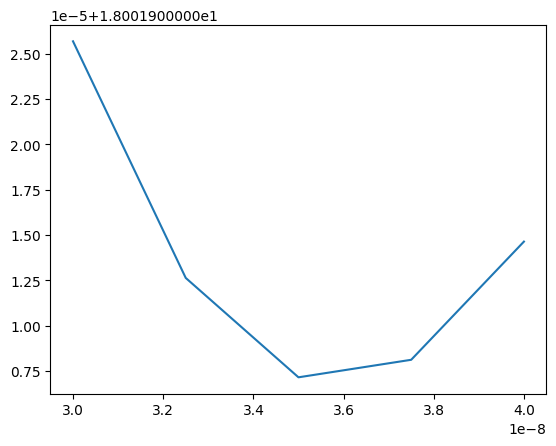

In [100]:
x = np.linspace(0.00000003, 0.00000004, 5)
y = []
for i in x:
    y.append(avg_pp_bigram(i))
    
plt.plot(x, y)

In [101]:
k = x[np.argmin(y)]
print('Optimized perplixity for Bigram for k =', k,'is', avg_pp_bigram(k))

3.4999999999999996e-08 18.001907159567995
Optimized perplixity for Bigram for k = 3.4999999999999996e-08 is 18.001907159567995


### Trigram

In [33]:
class trigram_model(bigram_model):
    
    def __init__(self, sentences):
        bigram_model.__init__(self, sentences)
        self.trigrams = dict()
        self.total_trigrams = 0
        for sent in sentences:
            for i in range(len(sent)-2):
                if (sent[i], sent[i+1], sent[i+2]) not in self.trigrams:
                    self.trigrams[(sent[i], sent[i+1], sent[i+2])] = 1
                else:
                    self.trigrams[(sent[i], sent[i+1], sent[i+2])] += 1
                self.total_trigrams += 1
        self.unique_trigrams = len(self.trigrams)
    
    def probability(self, pp_word, prev_word, word):
        if (pp_word, prev_word, word) not in self.trigrams:
            return 0; 
        else:
            return float(self.trigrams[(pp_word, prev_word, word)])/float(self.bigrams[(pp_word, prev_word)])
        
    def perplexity(self, sent):
        sum = 0
        n = 0
        for i in range(len(sent)-2):
            n+=1
            sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2]))
        result = 2**((-1/float(n)) * float(sum))
        return result
    
    def probability_smooth(self, pp_word, prev_word, word, k):
        return float(k + float(self.trigrams[(pp_word, prev_word, word)]))/(float(self.bigrams[(pp_word, prev_word)]) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = 0
        for i in range(len(sent)-2):
            n+=1
            sum += np.log2(self.probability_smooth(sent[i], sent[i+1], sent[i+2], k))
        result = 2**((-1/float(n)) * float(sum))
        return result

In [97]:
TRIGRAM_MODEL = trigram_model(train_trigram)

n = len(test_trigram)
sum = 0
for sent in test_trigram:
    sum+=TRIGRAM_MODEL.perplexity(sent)
avg_trigram_perplexity = sum/n
avg_trigram_perplexity

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22148\636619404.py:27: RuntimeWarning: divide by zero encountered in log2
  sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2]))


inf

In [38]:
TRIGRAM_MODEL = trigram_model(train_trigram)

for sent in test_trigram:
    prev_word = sent[0]
    for word in sent[1:]:
        if (prev_word, word) not in TRIGRAM_MODEL.bigrams:
            TRIGRAM_MODEL.bigrams[(prev_word, word)] = 0
            if word not in TRIGRAM_MODEL.unigrams:
                TRIGRAM_MODEL.unigrams[word] = 0
        prev_word = word
    for i in range(len(sent)-2):
        if(sent[i], sent[i+1], sent[i+2]) not in TRIGRAM_MODEL.trigrams:
            TRIGRAM_MODEL.trigrams[(sent[i], sent[i+1], sent[i+2])] = 0

TRIGRAM_MODEL.vocab_size = len(TRIGRAM_MODEL.unigrams)-2
TRIGRAM_MODEL.unique_bigrams = len(TRIGRAM_MODEL.bigrams)
TRIGRAM_MODEL.unique_trigrams = len(TRIGRAM_MODEL.trigrams)

def avg_pp_trigram(k):
    n = len(test_trigram)
    sum = 0
    for sent in test_trigram:
        sum+=TRIGRAM_MODEL.perplexity_smooth(sent, k)
    avg_trigram_perplexity_smooth = sum/n
    print(k, avg_trigram_perplexity_smooth)
    return avg_trigram_perplexity_smooth 

1.5e-07 7.919486803056827
1.7e-07 7.8977025500278275
1.8999999999999998e-07 7.879752667087822
2.1e-07 7.864750619153799
2.3e-07 7.852075834241069


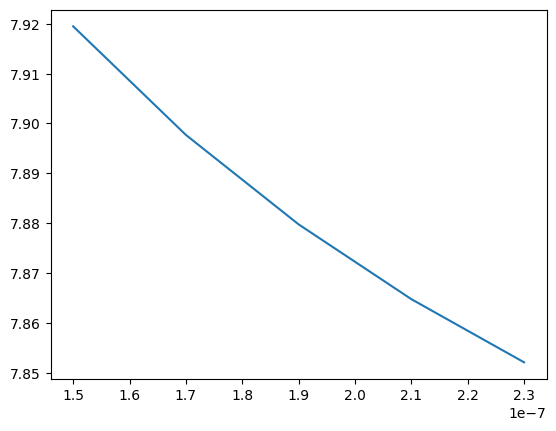

In [39]:
x = np.linspace(0.00000015, 0.00000023, 5)
y = []
for i in x:
    y.append(avg_pp_trigram(i))
    
plt.plot(x, y)

In [40]:
k = x[np.argmin(y)]
print('Optimized perplixity for Trigram for k =', k,'is', avg_pp_trigram(k))

2.3e-07 7.852075834241069
Optimized perplixity for Trigram for k = 2.3e-07 is 7.852075834241069


### Quadgram

In [34]:
class quadgram_model(trigram_model):
    
    def __init__(self, sentences):
        trigram_model.__init__(self, sentences)
        self.quadgrams = dict()
        self.total_quadgrams = 0
        for sent in sentences:
            for i in range(len(sent)-3):
                if (sent[i], sent[i+1], sent[i+2], sent[i+3]) not in self.quadgrams:
                    self.quadgrams[(sent[i], sent[i+1], sent[i+2], sent[i+3])] = 1
                else:
                    self.quadgrams[(sent[i], sent[i+1], sent[i+2], sent[i+3])] += 1
                self.total_quadgrams += 1
        self.unique_quadgrams = len(self.quadgrams)
    
    def probability(self, prev_p_word, pp_word, prev_word, word):
        if (prev_p_word, pp_word, prev_word, word) not in self.quadgrams:
            return 0; 
        else:
            return float(self.quadgrams[(prev_p_word, pp_word, prev_word, word)])/float(self.trigrams[(prev_p_word, pp_word, prev_word)])
        
    def perplexity(self, sent):
        sum = 0
        n = 0
        for i in range(len(sent)-3):
            n+=1
            sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2], sent[i+3]))
        result = 2**((-1/float(n)) * float(sum))
        return result
    
    def probability_smooth(self, prev_p_word, pp_word, prev_word, word, k):
        return float(k + float(self.quadgrams[(prev_p_word, pp_word, prev_word, word)]))/(float(self.trigrams[(prev_p_word, pp_word, prev_word)]) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = 0
        for i in range(len(sent)-3):
            n+=1
            sum += np.log2(self.probability_smooth(sent[i], sent[i+1], sent[i+2], sent[i+3], k))
        result = 2**((-1/float(n)) * float(sum))
        return result

In [109]:
QUADGRAM_MODEL = quadgram_model(train_quadgram)

n = len(test_quadgram)
sum = 0
for sent in test_quadgram:
    sum+=QUADGRAM_MODEL.perplexity(sent)
avg_quadgram_perplexity = sum/n
avg_quadgram_perplexity

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22148\1640041841.py:27: RuntimeWarning: divide by zero encountered in log2
  sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2], sent[i+3]))


inf

In [35]:
QUADGRAM_MODEL = quadgram_model(train_quadgram)

for sent in test_quadgram:
    prev_word = sent[0]
    for word in sent[1:]:
        if (prev_word, word) not in QUADGRAM_MODEL.bigrams:
            QUADGRAM_MODEL.bigrams[(prev_word, word)] = 0
            if word not in QUADGRAM_MODEL.unigrams:
                QUADGRAM_MODEL.unigrams[word] = 0
        prev_word = word
    for i in range(len(sent)-2):
        if(sent[i], sent[i+1], sent[i+2]) not in QUADGRAM_MODEL.trigrams:
            QUADGRAM_MODEL.trigrams[(sent[i], sent[i+1], sent[i+2])] = 0
    for i in range(len(sent)-3):
        if(sent[i], sent[i+1], sent[i+2], sent[i+3]) not in QUADGRAM_MODEL.quadgrams:
            QUADGRAM_MODEL.quadgrams[(sent[i], sent[i+1], sent[i+2], sent[i+3])] = 0

QUADGRAM_MODEL.vocab_size = len(QUADGRAM_MODEL.unigrams)-2
QUADGRAM_MODEL.unique_bigrams = len(QUADGRAM_MODEL.bigrams)
QUADGRAM_MODEL.unique_trigrams = len(QUADGRAM_MODEL.trigrams)
QUADGRAM_MODEL.unique_quadgrams = len(QUADGRAM_MODEL.quadgrams)

def avg_pp_quadgram(k):
    n = len(test_quadgram)
    sum = 0
    for sent in test_quadgram:
        sum+=QUADGRAM_MODEL.perplexity_smooth(sent, k)
    avg_quadgram_perplexity_smooth = sum/n
    print(k, avg_quadgram_perplexity_smooth)
    return avg_quadgram_perplexity_smooth 

2e-07 4.214071459135766
3e-07 4.217585073672223
4e-07 4.225746708870591
5e-07 4.236334145166454


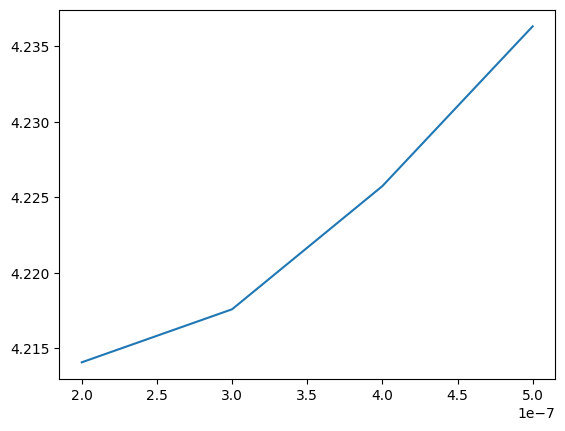

In [36]:
x = np.linspace(0.0000002, 0.0000005, 4)
y = []
for i in x:
    y.append(avg_pp_quadgram(i))
    
plt.plot(x, y)

In [37]:
k = x[np.argmin(y)]
print('Optimized perplixity for Quadgram for k =', k,'is', avg_pp_quadgram(k))

2e-07 4.214071459135766
Optimized perplixity for Quadgram for k = 2e-07 is 4.214071459135766


# BONUS